In [4]:
import pandas_datareader as pd_rd

In [7]:
data=pd_rd.get_data_tiingo("AAPL",api_key='c7f3727237483a284a514c5f697f4dc2c634b433')

/Users/srivatsa/opt/miniconda3/envs/tensorflow/lib/python3.9/site-packages/pandas_datareader/tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [11]:
data.to_csv('AAPL.csv')

In [17]:
import pandas as pd
import numpy as np

In [38]:
df=pd.read_csv('AAPL.csv')

In [39]:
df2=df.reset_index()['close']

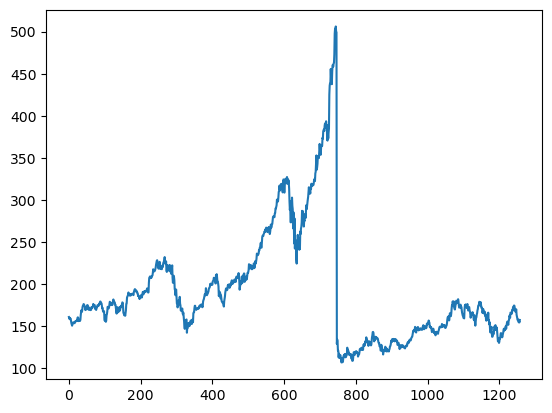

In [40]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [42]:
import numpy as np
df2

0       160.86
1       159.65
2       158.28
3       159.88
4       158.67
         ...  
1253    155.81
1254    154.53
1255    155.96
1256    154.46
1257    157.37
Name: close, Length: 1258, dtype: float64

In [1]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

NameError: name 'np' is not defined

In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
training_size,test_size

(817, 441)

In [22]:
train_data

array([[ 5.38088913e+01],
       [ 5.25988913e+01],
       [ 5.12288913e+01],
       [ 5.28288913e+01],
       [ 5.16188913e+01],
       [ 5.16788913e+01],
       [ 4.90188913e+01],
       [ 4.63388913e+01],
       [ 4.48388913e+01],
       [ 4.34988913e+01],
       [ 4.60888913e+01],
       [ 4.71788913e+01],
       [ 4.62288913e+01],
       [ 4.70688913e+01],
       [ 4.67588913e+01],
       [ 4.74288913e+01],
       [ 4.64288913e+01],
       [ 4.83388913e+01],
       [ 4.82488913e+01],
       [ 4.87888913e+01],
       [ 4.88488913e+01],
       [ 4.94988913e+01],
       [ 4.89488913e+01],
       [ 4.99388913e+01],
       [ 5.28288913e+01],
       [ 5.34188913e+01],
       [ 5.27088913e+01],
       [ 4.89288913e+01],
       [ 4.91988913e+01],
       [ 4.91188913e+01],
       [ 5.00488913e+01],
       [ 4.93588913e+01],
       [ 5.03588913e+01],
       [ 5.59988913e+01],
       [ 5.96688913e+01],
       [ 6.19888913e+01],
       [ 5.98388913e+01],
       [ 6.10588913e+01],
       [ 6.5

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Metal device set to: Apple M1


2022-09-11 15:11:21.673336: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-09-11 15:11:21.673421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 1s 65ms/step - loss: 17902.9766 - val_loss: 1735.1769
Epoch 2/100
12/12 [==============================] - 1s 65ms/step - loss: 17374.5488 - val_loss: 1580.8850
Epoch 3/100
12/12 [==============================] - 1s 65ms/step - loss: 17006.1250 - val_loss: 1483.9130
Epoch 4/100
12/12 [==============================] - 1s 65ms/step - loss: 16765.3105 - val_loss: 1419.4753
Epoch 5/100
12/12 [==============================] - 1s 65ms/step - loss: 16587.4180 - val_loss: 1365.5912
Epoch 6/100
12/12 [==============================] - 1s 65ms/step - loss: 16430.7090 - val_loss: 1316.5989
Epoch 7/100
12/12 [==============================] - 1s 68ms/step - loss: 16283.5654 - val_loss: 1270.6067
Epoch 8/100
12/12 [==============================] - 1s 65ms/step - loss: 16141.7666 - val_loss: 1226.4174
Epoch 9/100
12/12 [==============================] - 1s 66ms/step - loss: 16004.0586 - val_loss: 1183.9922
Epoch 10/100
12/12 [=================

12/12 [==============================] - 1s 65ms/step - loss: 9550.5303 - val_loss: 222.4098
Epoch 78/100
12/12 [==============================] - 1s 65ms/step - loss: 9484.4980 - val_loss: 224.1875
Epoch 79/100
12/12 [==============================] - 1s 64ms/step - loss: 9419.8281 - val_loss: 217.8887
Epoch 80/100
12/12 [==============================] - 1s 67ms/step - loss: 9356.3867 - val_loss: 227.3566
Epoch 81/100
12/12 [==============================] - 1s 67ms/step - loss: 9292.3779 - val_loss: 246.5662
Epoch 82/100
12/12 [==============================] - 1s 65ms/step - loss: 9229.5254 - val_loss: 251.4373
Epoch 83/100
12/12 [==============================] - 1s 65ms/step - loss: 9166.9092 - val_loss: 251.1652
Epoch 84/100
12/12 [==============================] - 1s 70ms/step - loss: 9103.8828 - val_loss: 256.8748
Epoch 85/100
12/12 [==============================] - 1s 67ms/step - loss: 9041.3945 - val_loss: 256.2485
Epoch 86/100
12/12 [==============================] - 1s 65

In [33]:
import tensorflow as tf

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

2022-09-11 15:13:08.657131: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-11 15:13:08.743390: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-09-11 15:13:08.840718: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 3/23 [==>...........................] - ETA: 0s 

2022-09-11 15:13:08.943790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


11/11 [==============================] - 1s 50ms/step


In [35]:

df1.shape, type(df1), df1

((1258, 1),
 numpy.ndarray,
 array([[53.8088913],
        [52.5988913],
        [51.2288913],
        ...,
        [48.9088913],
        [47.4088913],
        [50.3188913]]))

In [36]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [48]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

236.7863030351245

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

157.57632678636122

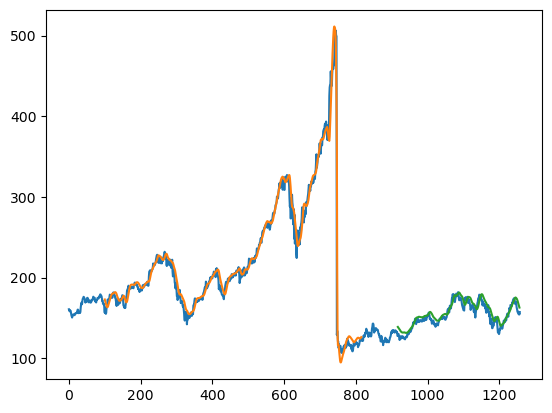

In [50]:
### Plotting 
# shift train predictions for plotting
import matplotlib.pyplot as plt
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

441

In [52]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.1516844082654978,
 0.15125860989355036,
 0.14922980588603627,
 0.13763306199123354,
 0.14036318096430805,
 0.12513462742642456,
 0.12455854727614274,
 0.14226675015654347,
 0.12726361928616156,
 0.1280400751408892,
 0.13184721352536002,
 0.14822792736380716,
 0.12505948653725737,
 0.12633688165309956,
 0.11326236693800876,
 0.11939887288666245,
 0.09933625547902317,
 0.08946775203506574,
 0.1008641202254227,
 0.09693174702567312,
 0.10619912335629306,
 0.08510958046336879,
 0.07641828428303066,
 0.07701941139636818,
 0.0908453350031309,
 0.08395742016280529,
 0.08435817157169695,
 0.09252348152786474,
 0.10720100187852219,
 0.10519724483406387,
 0.1048716343143394,
 0.11113337507827177,
 0.09653099561678144,
 0.09843456480901687,
 0.1048716343143394,
 0.10299311208515968,
 0.08966812773951154,
 0.07586725109580461,
 0.06271759549154662,
 0.06492172824045081,
 0.07160926737633062,
 0.05815904821540388,
 0.0619160926737633,
 0.07271133375078272,
 0.07140889167188476,
 0.07872260488415

In [55]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.13506766]
101
1 day input [0.15125861 0.14922981 0.13763306 0.14036318 0.12513463 0.12455855
 0.14226675 0.12726362 0.12804008 0.13184721 0.14822793 0.12505949
 0.12633688 0.11326237 0.11939887 0.09933626 0.08946775 0.10086412
 0.09693175 0.10619912 0.08510958 0.07641828 0.07701941 0.09084534
 0.08395742 0.08435817 0.09252348 0.107201   0.10519724 0.10487163
 0.11113338 0.096531   0.09843456 0.10487163 0.10299311 0.08966813
 0.07586725 0.0627176  0.06492173 0.07160927 0.05815905 0.06191609
 0.07271133 0.07140889 0.0787226  0.08721353 0.08721353 0.07664371
 0.08112711 0.07484033 0.0803757  0.08696306 0.09036944 0.09896055
 0.10068879 0.0952536  0.09773325 0.09680651 0.10427051 0.10852849
 0.10076393 0.11060739 0.11571697 0.12150282 0.1183469  0.11549155
 0.11211021 0.12510958 0.12651221 0.13943644 0.13693175 0.1331747
 0.14850344 0.14770194 0.14654978 0.14534753 0.14547276 0.15629305
 0.15441453 0.16345648 0.1661866  0.16578585 0.16959299 0.16859111
 0.16200376 0.15211021 0.15125861 

10 day output [[0.14497134]]
11 day input [0.14822793 0.12505949 0.12633688 0.11326237 0.11939887 0.09933626
 0.08946775 0.10086412 0.09693175 0.10619912 0.08510958 0.07641828
 0.07701941 0.09084534 0.08395742 0.08435817 0.09252348 0.107201
 0.10519724 0.10487163 0.11113338 0.096531   0.09843456 0.10487163
 0.10299311 0.08966813 0.07586725 0.0627176  0.06492173 0.07160927
 0.05815905 0.06191609 0.07271133 0.07140889 0.0787226  0.08721353
 0.08721353 0.07664371 0.08112711 0.07484033 0.0803757  0.08696306
 0.09036944 0.09896055 0.10068879 0.0952536  0.09773325 0.09680651
 0.10427051 0.10852849 0.10076393 0.11060739 0.11571697 0.12150282
 0.1183469  0.11549155 0.11211021 0.12510958 0.12651221 0.13943644
 0.13693175 0.1331747  0.14850344 0.14770194 0.14654978 0.14534753
 0.14547276 0.15629305 0.15441453 0.16345648 0.1661866  0.16578585
 0.16959299 0.16859111 0.16200376 0.15211021 0.15125861 0.15201002
 0.15827176 0.14221666 0.13660614 0.13041954 0.1261866  0.12804008
 0.12265498 0.11944897

20 day output [[0.16277859]]
21 day input [0.08510958 0.07641828 0.07701941 0.09084534 0.08395742 0.08435817
 0.09252348 0.107201   0.10519724 0.10487163 0.11113338 0.096531
 0.09843456 0.10487163 0.10299311 0.08966813 0.07586725 0.0627176
 0.06492173 0.07160927 0.05815905 0.06191609 0.07271133 0.07140889
 0.0787226  0.08721353 0.08721353 0.07664371 0.08112711 0.07484033
 0.0803757  0.08696306 0.09036944 0.09896055 0.10068879 0.0952536
 0.09773325 0.09680651 0.10427051 0.10852849 0.10076393 0.11060739
 0.11571697 0.12150282 0.1183469  0.11549155 0.11211021 0.12510958
 0.12651221 0.13943644 0.13693175 0.1331747  0.14850344 0.14770194
 0.14654978 0.14534753 0.14547276 0.15629305 0.15441453 0.16345648
 0.1661866  0.16578585 0.16959299 0.16859111 0.16200376 0.15211021
 0.15125861 0.15201002 0.15827176 0.14221666 0.13660614 0.13041954
 0.1261866  0.12804008 0.12265498 0.11944897 0.12303068 0.11927364
 0.1265623  0.13506766 0.13399318 0.13394852 0.13459994 0.13567375
 0.13699102 0.13844982 0

29 day output [[0.17762835]]
[[0.1350676566362381], [0.13399317860603333], [0.13394851982593536], [0.1345999389886856], [0.13567374646663666], [0.13699102401733398], [0.13844981789588928], [0.13999728858470917], [0.14160782098770142], [0.14326854050159454], [0.1449713408946991], [0.14670927822589874], [0.14847517013549805], [0.1502615213394165], [0.15206095576286316], [0.15386617183685303], [0.15567056834697723], [0.15746834874153137], [0.15925472974777222], [0.1610257476568222], [0.1627785861492157], [0.16451117396354675], [0.16622254252433777], [0.1679120808839798], [0.16958004236221313], [0.17122699320316315], [0.17285390198230743], [0.17446212470531464], [0.17605307698249817], [0.17762835323810577]]
